# 구스토타코 wordcloud

In [13]:
import pandas as pd

df = pd.read_excel('./py_data/crawling/서울_구스토타코_리뷰.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,평점,날짜,제목,글
0,0,40,2020년 3월 8일,퓨전 타코,전형적인 타코는 아니고 약간 변형된 타코지만 먹을만 합니다. 한 번 갔다가 마음에 ...
1,1,50,2019년 12월 5일,늘 보장하는 맛,상수역에 생기기 전에 홍대앞에 있을 때부터 종종 가던 곳이에요. 타코가 작고 비싸지...
2,2,40,2019년 11월 3일,타코,타코가 먹고싶다면 이곳을 들리세요!!타코를 워낙 좋아하는데 여기 타코는 정말 맛있어...
3,3,40,2019년 9월 5일,한국식으로 재해석된 타코,약간 한국식으로 재해석된 타코인 것 같아서 좋았어요. 완전 오리지널 타코를 찾는 분...
4,4,10,2019년 8월 17일,맛이 변했어요,몇년전에 진짜 맛있게 먹었던 기억이 나서 다시 방문했는데 맛이 너무 없어요 변했어요...


In [16]:
txt = ''
for i, r in df.iterrows():
    txt += r[4]

In [27]:
from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(txt)

In [22]:
from collections import Counter

counts = Counter(nouns)
counts_rank = counts.most_common()  # 내림차순 튜플로 변환

In [30]:
counts_rank[:10]

[('타코', 744),
 ('음식', 454),
 ('수', 354),
 ('곳', 327),
 ('이', 326),
 ('그', 300),
 ('것', 274),
 ('우리', 268),
 ('주인', 266),
 ('나', 253)]

## ckonlpy

In [32]:
print(txt)

전형적인 타코는 아니고 약간 변형된 타코지만 먹을만 합니다. 한 번 갔다가 마음에 들어 친구들과 더 방문했는데 만족합니다.상수역에 생기기 전에 홍대앞에 있을 때부터 종종 가던 곳이에요. 타코가 작고 비싸지만 외국인 친구들이 무난하게 먹는 곳이라 갑니다. 타코가 먹고싶다면 이곳을 들리세요!!타코를 워낙 좋아하는데 여기 타코는 정말 맛있어요ㅎㅎ 입맛에 딱맞아서 마음에 들었어요약간 한국식으로 재해석된 타코인 것 같아서 좋았어요. 완전 오리지널 타코를 찾는 분께서는 불만족할 수 있으나 저는 아주 만족스럽게 한끼를 먹었습니다. 몇년전에 진짜 맛있게 먹었던 기억이 나서 다시 방문했는데 맛이 너무 없어요 변했어요 ㅜㅠㅠㅠ내 구스토타코 돌려줘요 ㅜㅜㅜㅜㅜ이것은 타코가 아닙니다. 살면서 먹은 최악의 타코. 공짜로 줘도 못 먹을 멕시코 음식을 모욕하는 맛. 진심으로 충격과 공포였습니다. 제발 멕시코 가서 한번만이라도 타코 드셔보세요. 좋은 하루 되세요.타코와 브리또를 먹었는데, 주변에서 맛있다는 소리를 너무 많이 들어서 기대감이 높은채로 방문해서인지 그렇게까지 맛있다고 느끼진 못했다. 아니 오히려 맛이 없다고 느낀부분이 좀 더 크다고 해야하나.. 물론 나도 타코를 많이 먹어본 것은 아니지만 미국에서 먹었던 타코들보다도 더 심심한느낌이었다 내가 자극적인것을 좋아해서 그런지도 모르겠다.외국인 친구 예약으로 전화해서 인원수와 예약문의 드리고 방문 했더니 다시 전화 와서 계속 자리 좁은데 사람이 너무 많이 왔다면서 방문객이 어느 나라 사람인지 묻더군요, 다시 전화 한다고 해도 바쁘다고 빨리 말하라고;;;; 알러지나 채식주의 여부를 묻는건지 본인이 외국인이라면 직접 물어봐도 될 것같은데;; 안내받고 방문 한건데 이런 반응은 처음이네요타코를 좋아한다면 구스토 타코를 먹어야만 한다. 타코를 그닥 좋아하지 않는다면 구스토 타코를 먹어봐야 한다. 어느 경우이든 타코의 신세계를 경험할 수 있다!미국인 주인과 교포들로 이루어진 스탭들은 한국어보다 영어에 익숙하다. 따라서 외국인 여행자들이 많이 찾

In [47]:
from ckonlpy.tag import Twitter, Postprocessor

stopwords = {}   # 불용어
replace = {'예약 문의':'예약문의', '한국 음식':'한국음식', '돼지 고기':'돼지고기', '향토 맥주':'향토맥주', 
           '구스토 타코':'구스토타코'}  # 교체어

twitter = Twitter()

twitter.add_dictionary('예약 문의', 'Noun')
twitter.add_dictionary('한국 음식', 'Noun')
twitter.add_dictionary('돼지 고기', 'Noun')
twitter.add_dictionary('돼지고기', 'Noun')
twitter.add_dictionary('향토 맥주', 'Noun')
twitter.add_dictionary('구스토 타코', 'Noun')
twitter.add_dictionary('구스토타코', 'Noun')

postprocessor = Postprocessor(twitter, stopwords = stopwords, replace = replace)

ls_pos = postprocessor.pos(txt)

In [64]:
ls_pos[:20]

[('전형', 'Noun'),
 ('적', 'Noun'),
 ('인', 'Josa'),
 ('타코', 'Noun'),
 ('는', 'Josa'),
 ('아니', 'Adverb'),
 ('고', 'Noun'),
 ('약간', 'Noun'),
 ('변형', 'Noun'),
 ('된', 'Verb'),
 ('타코', 'Noun'),
 ('지만', 'Josa'),
 ('먹을만', 'Verb'),
 ('합니다', 'Verb'),
 ('.', 'Punctuation'),
 ('한', 'Verb'),
 ('번', 'Noun'),
 ('갔', 'Verb'),
 ('다가', 'Noun'),
 ('마음', 'Noun')]

In [54]:
nouns = [word for word, pos in ls_pos if pos == 'Noun']

In [65]:
nouns[:20]

['전형',
 '적',
 '타코',
 '고',
 '약간',
 '변형',
 '타코',
 '번',
 '다가',
 '마음',
 '친',
 '구들',
 '더',
 '방문',
 '만족',
 '상수역',
 '생기',
 '기',
 '전',
 '홍대앞']

In [70]:
from collections import Counter

counts = Counter(nouns)
counts

Counter({'전형': 3,
         '적': 97,
         '타코': 737,
         '고': 85,
         '약간': 15,
         '변형': 1,
         '번': 52,
         '다가': 5,
         '마음': 22,
         '친': 51,
         '구들': 30,
         '더': 94,
         '방문': 82,
         '만족': 17,
         '상수역': 8,
         '생기': 2,
         '기': 34,
         '전': 56,
         '홍대앞': 2,
         '때': 85,
         '부터': 7,
         '종종': 1,
         '곳': 327,
         '작고': 2,
         '외국인': 25,
         '무': 4,
         '난하': 1,
         '리세': 1,
         '워낙': 4,
         '아하': 42,
         '데': 18,
         '여기': 60,
         '정말': 201,
         '어요': 133,
         '입맛': 6,
         '한국': 95,
         '식': 8,
         '재해': 1,
         '석': 1,
         '것': 276,
         '완전': 11,
         '오리': 1,
         '널': 1,
         '분': 19,
         '불만족': 2,
         '수': 353,
         '저': 232,
         '아주': 142,
         '끼': 3,
         '년전': 1,
         '진짜': 17,
         '기억': 16,
         '다시': 105,
         '맛': 152,
  

In [66]:
counts_rank[:20]

[('타코', 737),
 ('음식', 454),
 ('수', 353),
 ('이', 336),
 ('곳', 327),
 ('그', 319),
 ('것', 276),
 ('우리', 268),
 ('주인', 262),
 ('나', 253),
 ('서울', 233),
 ('저', 232),
 ('멕시코', 206),
 ('정말', 201),
 ('고기', 201),
 ('돼지', 189),
 ('친절', 181),
 ('구', 161),
 ('스토', 157),
 ('맛', 152)]

In [60]:
counts_edit = []
for word, cnt in counts_rank:
    if (len(word) > 1) & (cnt > 1):
        counts_edit.append((word, cnt))

In [67]:
counts_edit[:20]

[('타코', 737),
 ('음식', 454),
 ('우리', 268),
 ('주인', 262),
 ('서울', 233),
 ('멕시코', 206),
 ('정말', 201),
 ('고기', 201),
 ('돼지', 189),
 ('친절', 181),
 ('스토', 157),
 ('최고', 151),
 ('아주', 142),
 ('사람', 134),
 ('어요', 133),
 ('매우', 133),
 ('추천', 131),
 ('분위기', 121),
 ('직원', 116),
 ('서비스', 113)]

# wordcloud

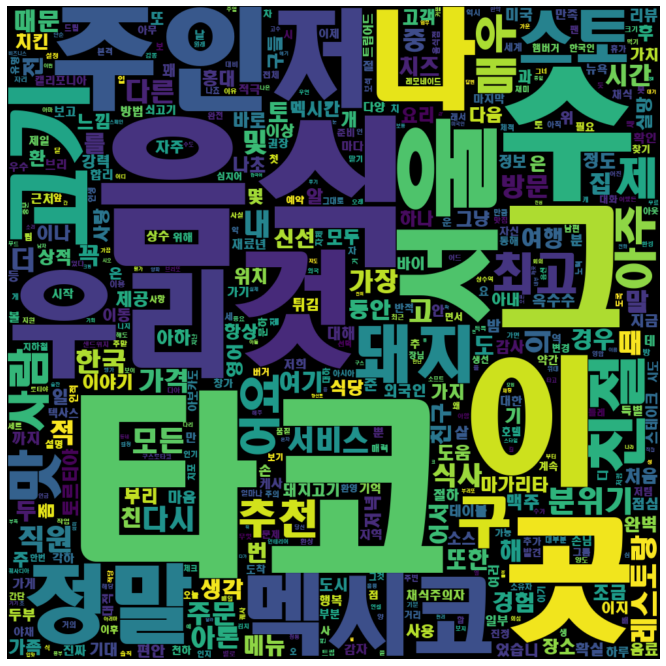

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      background_color = 'black', 
                      width = 1000, height = 1000,
                      max_words = 500,
                      max_font_size = 300)

wc = wordcloud.generate_from_frequencies(counts)
plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

plt.savefig('./py_data/wordcloud/구스토타코_워드클라우드.jpg')
plt.show()